# Jun ??th, 2022 (permutation test)

**Motivation**:   <br>

In [3]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from model.configuration import Config
from model.mouse import Mice
from analysis.group import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

In [2]:
def quick_show(
    data,
    vmin=0.1,
    vmax=None,
    figsize=None,
    cmap='magma',
    ylabel_fontsize=11.5,
    show: bool = True, ):
    num = max(len(tr['proj-top']) for tr in data.values())
    figsize = figsize if figsize else (13.5, 1.6 * len(data))
    fig, axes = create_figure(
        nrows=len(data),
        ncols=num,
        figsize=figsize,
        tight_layout=False,
        constrained_layout=False,
        reshape=True,
    )
    for i, (lbl, tr) in enumerate(data.items()):
        for j in range(num):
            ax = axes[i, j]
            if j >= len(tr['proj-top']):
                ax.remove()
            else:
                ax.imshow(mwh(tr['top'] == 0, tr['top']), cmap='Greys_r')
                if np.nanmax(tr['proj-top'][j]) > 1:
                    _cmap = get_cluster_cmap(range(len(tr['proj-top']) - 1))
                    _vmax = None
                else:
                    _cmap = cmap
                    _vmax = vmax
                ax.imshow(
                    mwh(tr['proj-top'][j] < vmin, tr['proj-top'][j]),
                    cmap=_cmap, vmin=vmin, vmax=_vmax,
                )
                if j == 0:
                    ax.set_ylabel(lbl, fontsize=ylabel_fontsize)
    remove_ticks(axes)
    if show:
        plt.show()
    else:
        plt.close()
    return fig, axes


In [3]:
rv1 = sp_stats.norm(0.15, 1)
rv2 = sp_stats.norm(-0.15, 1)

[<matplotlib.lines.Line2D object at 0x7fe4b5624970>]

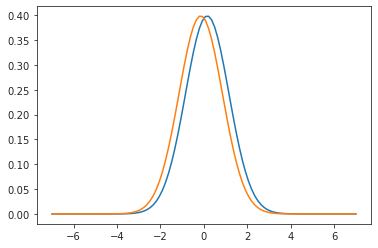

In [4]:
set_style()
x = np.linspace(-7,7,100)
plt.plot(x, rv1.pdf(x))
plt.plot(x, rv2.pdf(x))

<AxesSubplot:ylabel='Count'>

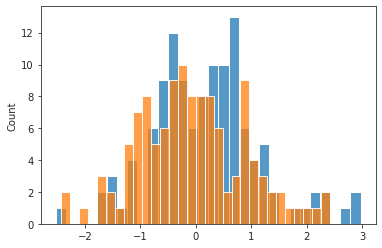

In [5]:
y1 = rv1.rvs(120)
y2 = rv2.rvs(120)

sns.histplot(y1, bins=30, color='C0')
sns.histplot(y2, bins=30, color='C1')

In [6]:
def statistic1(a, b):
    return bn.nanmean(a) - bn.nanmean(b)

def statistic2(a, b):
    return bn.nanmean(a - b)

In [7]:
test1 = sp_stats.permutation_test(
    data=(y1, y2),
    statistic=statistic1,
    permutation_type='samples',
    alternative='two-sided',
)
test1

PermutationTestResult(
    statistic=0.27666943733718286,
    pvalue=0.0398,
    null_distribution=array([ 0.05084784, -0.14348988, -0.05023408, ...,  0.0314059 ,
       -0.01904414, -0.15284994])
)

In [8]:
test2 = sp_stats.permutation_test(
    data=(y1, y2),
    statistic=statistic2,
    permutation_type='samples',
    alternative='two-sided',
)
test2

PermutationTestResult(
    statistic=0.276669437337183,
    pvalue=0.036,
    null_distribution=array([-0.01190713, -0.15776312, -0.17147884, ..., -0.00684504,
       -0.01586471,  0.0861339 ])
)

<matplotlib.lines.Line2D object at 0x7fe563d89130>

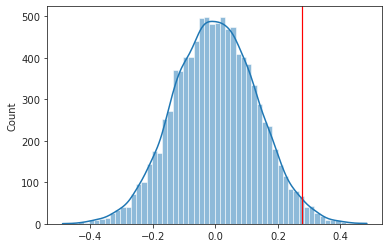

In [9]:
sns.histplot(test2.null_distribution, kde=True)
plt.axvline(test2.statistic, color='r', ls='-', lw=1.2)

In [10]:
import pandas as pd
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 4bfe3d07b4858144c219b9346329027024102ab6
python           : 3.8.3.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.13.0-44-generic
Version          : #49~20.04.1-Ubuntu SMP Wed May 18 18:44:28 UTC 2022
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.4.2
numpy            : 1.20.3
pytz             : 2021.3
dateutil         : 2.8.2
pip              : 21.2.4
setuptools       : 61.2.0
Cython           : 0.29.28
pytest           : 7.1.1
hypothesis       : None
sphinx           : 4.4.0
blosc            : None
feather          : None
xlsxwriter       : 3.0.3
lxml.etree       : 4.8.0
html5lib         : 1.1
pymysql          : None
psycopg2         : 2.8.6
jinja2           : 3.0.3
IPython          : 8.3.0
pandas_datareader: None
bs4              : 4.11.1
bottleneck       : 1.3.